In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score
from scipy import linspace, polyval, sqrt, randn

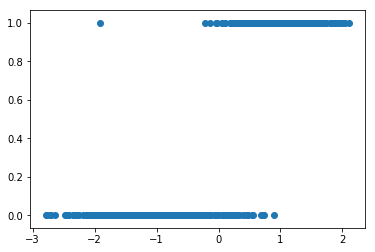

In [2]:
# generate regression dataset
X, y = make_classification(n_samples=1000, n_features=1, n_informative=1, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=1, random_state=0)
# X, y = make_regression(n_samples=100, n_features=1, noise=0.2)
# plot regression dataset
plt.scatter(X,y)
plt.show()

In [3]:
# sample data creation
# number of points 
n = int(50000)
X = np.linspace(-20, 20, n)
# print("t: ", t)
# parameters
a = 3.25; b = -6.5
Y = polyval([a,b], X)
# print("x: ", x)
# add some noise
Yn = Y + 3 * randn(n)

Full Gradient Descent..
Time taken:  3.71 secs
No of iterations:  422
R2 score:  0.9685
Plot: 


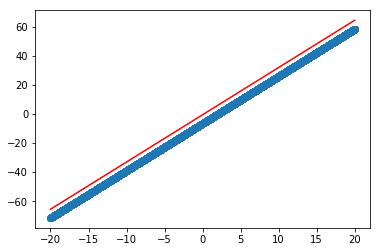

In [4]:
# Full Gradient Descent
# initial slope and intercept for model
start = time.time()
m = 0
c = 0
prev_step = 1
precision = 0.000001
eta = 0.0001 # learning rate
epoch = 0
max_epochs = 2000 # no of iterations to run GD

# perform full gradient descent
while prev_step > precision and epoch < max_epochs:
    Y_pred = m * X + c
    D_m = (-2/n) * sum((Yn - Y_pred) * X)
    D_c = (-2/n) * sum(Yn - Y_pred)
    prev_m = m
    m = m - eta * D_m
    c = c - eta * D_c
    prev_step = abs(m - prev_m)
    epoch += 1
end = time.time()

# predict values
Y_pred = m * X + c

print("Full Gradient Descent..")
print("Time taken: ", round(end - start, 2), "secs")
print("No of iterations: ", epoch)
print("R2 score: ", round(r2_score(Yn, Y_pred), 4))

# plot result
plt.scatter(X, Y)
print("Plot: ")
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # regression line
plt.show()

In [5]:
# Stochastic Gradient Descent
# initial slope and intercept for model
start = time.time()
m = 0
c = 0
eta = 0.0001 # learning rate
epoch = 0
max_epochs = 1000 # no of iterations to run GD

# create random mini-batches
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert inputs.shape[0] == targets.shape[0]
    if shuffle:
        indices = np.arange(inputs.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, inputs.shape[0] - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]
        
newX, newY = iterate_minibatches(X[0:10], Yn[0:10], 5, True)
print(len(newX))
print(len(newY))
print("X: ", X)
print("Yn: ", Yn)
print("new X: ", newX)
print("new Yn: ", newY)


# while prev_step > precision and epoch < max_epochs:
for i in range(len(newX)):
    batchX = newX[i]
    batchYn = newY[i]
    Y_pred = m * X + c
    D_m = (-2/n) * sum((batchYn - Y_pred) * batchX)
    D_c = (-2/n) * sum(batchYn - Y_pred)
#     prev_m = m
    m = m - eta * D_m
    c = c - eta * D_c
#     prev_step = abs(m - prev_m)
#     epoch += 1
end = time.time()

# predict values
Y_pred = m * X + c

print("Full Gradient Descent..")
print("Time taken: ", round(end - start, 2), "secs")
print("No of iterations: ", epoch)
print("R2 score: ", round(r2_score(Yn, Y_pred), 4))

# plot result
plt.scatter(X, Y)
print("Plot: ")
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # regression line
plt.show()

2
2
X:  [-20.         -19.99919998 -19.99839997 ...  19.99839997  19.99919998
  20.        ]
Yn:  [-66.78905048 -69.73977976 -81.4617616  ...  53.76608728  57.74263577
  55.15431944]
new X:  (array([-19.99919998, -19.9951999 , -19.99759995, -19.99359987,
       -19.99839997]), array([-69.73977976, -71.1757215 , -74.71231375, -66.64398178,
       -81.4617616 ]))
new Yn:  (array([-20.        , -19.99439989, -19.99279986, -19.99599992,
       -19.99679994]), array([-66.78905048, -77.3402522 , -69.93407972, -73.36317028,
       -70.53937678]))


ValueError: operands could not be broadcast together with shapes (5,) (50000,) 